<center>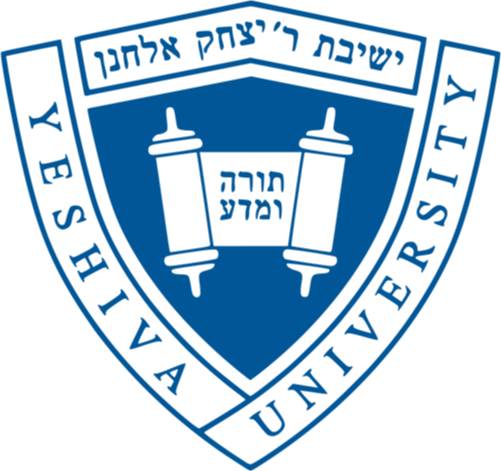</center>

# <center>Katz School of Science and Health<br>AIM 5002 Computational Statistics and Probability<br><br>Homework #4</center><br><br>

### <center> Radek Jan Holik </center>
<center> October 3, 2022 </center>

This is a long HW. The problems are worth 30 points in total but 25 points
will be considered 100%. In other words, you can skip problems worth of 5
points and still get a perfect score. I encourage you to submit all solutions by
9/28 but the hard deadline in 10/5. We won't meet on 10/5 and so HW5 will
only be due later.

In [1]:
# Python libraries
import math
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

## Task 1
**(7 points This problem really belongs to week 3 but I did not want to overload HW3 with R problems)** Checking normality of data with Q-Q plot.<p>
In many of the above problems, we assume the normality of the data. In practice, the normality of the data is rarely assumed a priori, but instead we are supposed to check it. In this problem, we discuss a somewhat informal graphical method to check normality of a given dataset.<p>
Assume that $Y$ has standard normal distribution with expectation $\mu$ and standard deviation $\sigma$. Let $q(p)$ be the p-quantile of $Y$ , that is $P(Y \le q) = p$. By standard-ization we see (check it) that $(q(p) - \mu)/\sigma = z_{1−p}$, where $z_{1−p}$ is the p-quantile of the standard Gaussian distribution. We found a linear relationship between the quantiles of $Y$ and the quantiles of the standard Gaussian distribution.<p>
Now given a sample, we can test normality by plotting the sample quantiles against the theoretical quantiles of the standard Gaussian distribution (Q-Q plot). If we see a linear graph, we believe that the sample comes from a normal population but if the graph is not linear, we believe that the population is not normal.

### Solution:

In [2]:
np.random.seed(1)

n = 500
mean = 10
sd = 3

'''
    The equivalent of the rnorm() function in Python is the np.random.normal()
    rnorm(n, mean, sd) = np.random.normal(mean, sd, n)
'''
data1 = np.random.normal(mean, sd, n)


lamb = 3
'''
    The equivalent of the rpois() function in Python is the np.random.poisson()
    rpois(n, lambda) = np.random.poisson(lambda, n)
'''

data2 = np.random.poisson(lamb, n)


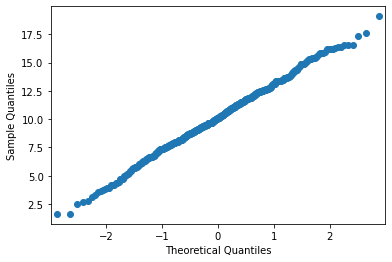

In [3]:
'''
    The equivalent of the qqnorm(data1) function in Python is the sm.qqplot(data1)
'''
sm.qqplot(data1)
plt.show()

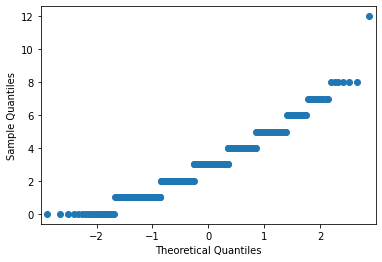

In [4]:
sm.qqplot(data2)
plt.show()

You should see two Q-Q plots, the first one is approximately linear, the second one is not.

### **(a)** 
Now generate data of size $n$ from exponential distribution with $\lambda = 1/4$ ($\lambda = 1/\mu$).

### Solution:

In [5]:
rate = 1/4
scale = 1 / rate
data3 = np.random.exponential(scale, n)

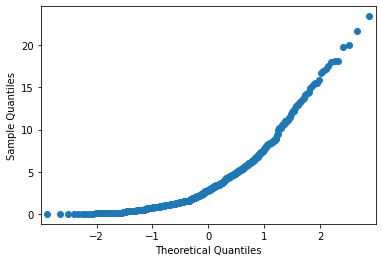

In [6]:
sm.qqplot(data3)
plt.show()

### **(b)** 
Compute the average

### Solution:

In [7]:
avrData3 = np.average(data3)
print(avrData3)

4.130664999099742


### **(c)**

Repeat this process $1000$ times to obtain $1000$ averages.

### Solution:

In [8]:
maxIterations = 1000
dataAvrExp = []

for i in range(maxIterations):
    dataAvrExp.append(np.average(np.random.exponential(scale, n)))

In [9]:
# First 10 averages
dataAvrExp[:10]

[3.812814695116158,
 3.9951131249906027,
 3.779451833648165,
 4.2000689367333885,
 4.094039263273938,
 4.0910653265426715,
 3.6166971232042076,
 3.7761086805006294,
 3.824240323003226,
 3.9863341353044808]

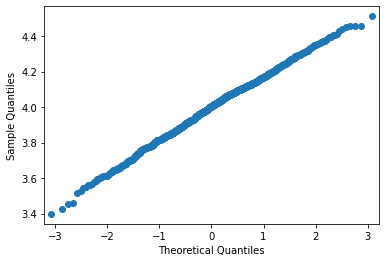

In [10]:
sm.qqplot(np.array(dataAvrExp))
plt.show()

### **(d)**
Create a Q-Q plot to check the validity of the CLT for $n = 1$, $5$, $30$, $100$.

### Solution:

n = 1


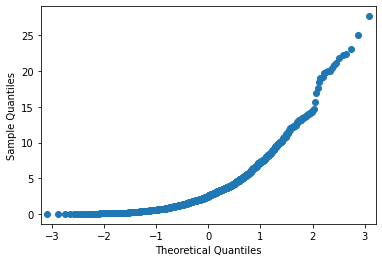

n = 5


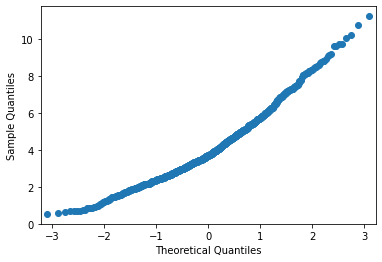

n = 30


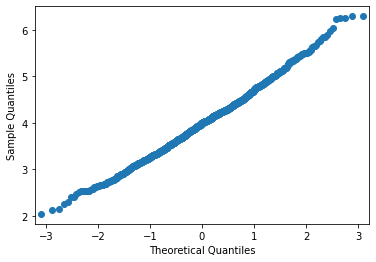

n = 100


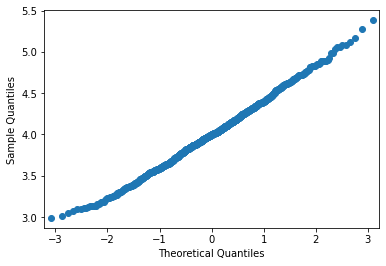

In [11]:
N = [1, 5, 30, 100]
datalist = []

for n in N:
    dataAvrExp = []

    for i in range(maxIterations):
        dataAvrExp.append(np.average(np.random.exponential(scale, n)))
    
    print(f"n = {n}")
    sm.qqplot(np.array(dataAvrExp))
    plt.show()

Two last Q-Q plots have more like normal distribution (linear), and they follow the CLT.

## Task 2
**(3+3+3 points)** Let $X_1, \dots, X_5$ be random integers chosen without replacement from the list ${1,  	\dots, N}$. Here $N$ is an unknown parameter that we want to estimate. Let $Y_1, \dots, Y_2$ be the order statistics obtained from $X_1, \dots, X_5$, that is $Y_1 = min\{X_1, \dots, X_5\}$, $Y_2$ is the smallest of $\{X_1, \dots, X_5\}$ excluding $Y_1$, etc. That is $Y_1 < Y_2 < \dots < Y_5$ is obtained by ordering $X_1, \dots, X_5$.<p>
Now assume that<p>
$E(Y_1) = E(Y_2 −Y_1) = E(Y_3 −Y_2) = E(Y_4 − Y_3) = E(Y_5 −Y_4) = N − E(Y_5) + 1. $ (1)<p>
This is true but a little tedious to prove (we proved the continuous variant of this on class).

### **(a)** 
Write<p>
$N = Y_1 + (Y_2 − Y_1) + (Y_3 − Y_2) + (Y_4 − Y_3) + (Y_5 − Y_4) + (N − Y_5 + 1) − 1$<p>
take expectations and use (1) to derive that $N = 6E(Y_1) − 1$.

### Solution:

### The following applies:<p>
$E(Y_1) = E(Y_2) - E(Y_1) \to  E(Y_2) = 2 E(Y_1)$<br>
$E(Y_1) = E(Y_3) - E(Y_2) \to  E(Y_3) = 3 E(Y_1)$<br>
$E(Y_1) = E(Y_4) - E(Y_3) \to  E(Y_4) = 4 E(Y_1)$<br>
$E(Y_1) = E(Y_5) - E(Y_4) \to  E(Y_5) = 5 E(Y_1)$<p>
### <center> $E(Y_1) = N - E(Y_5) + 1 \to E(Y_1) = N - 5 E(Y_1) + 1$ </center>
then:<br>
### <center> $N = 6 E(Y_1) - 1$ </center>

### **(b)** 
Use (1) to derive that $E(Y_5) = 5E(Y_1)$.

### Solution:

### As shown in (a), the following holds true::<p>
$E(Y_1) = E(Y_2) - E(Y_1) \to  E(Y_2) = 2 E(Y_1)$<br>
$\vdots$<br>
$E(Y_1) = E(Y_5) - E(Y_4) \to  E(Y_5) = 5 E(Y_1)$<p>
then:<br>
### <center> $E(Y_5) = 5 E(Y_1)$ </center>

### **(c)** 
Use **(a)** and **(b)** to derive that $\hat{N} = \frac{6Y_5}{5} − 1$ is an unbiased estimator of $N$

### Solution:

From (b), the following applies:<br>
$E(Y_5) = 5 E(Y_1) \to E(Y_1) = \frac{1}{5} E(Y_5)$<p>
From (b) and the preceding, the following applies:<br>
$N = 6 E(Y_1) - 1 \to N = \frac{6}{5} E(Y_5) - 1$<p>
For an unbiased estimator, the following applies:<br>
$E(\hat{N}) = N$<p>
then:<br>
### <center> $E(\hat{N}) = E \left( \frac{6}{5} Y_5 - 1 \right) = \frac{6}{5} E(Y_5) -1 = N$ </center> <p>
We see that $\hat{N}$ is an unbiased estimator for $N$.


## Task 3
Let $x_1, \dots, x_n$ be a random sample from a normally distributed population with known expectation μ and unknown variance $\sigma^2$.

### **(a)** 
**(3 points)** Show that $\hat{\sigma}^2 = \frac{1}{n} \sum^n_{i=1} (X_i − \mu)^2$ is an unbiased estimator of $\sigma^2$.

### Solution:

We can the above expression rewrite as follow::<p>
$\hat{\sigma}^2 = \frac{1}{n}\Sigma_{i=1}^n (x_i - \mu)^2 = \frac{1}{n} \Sigma_{i=1}^n (x_i^2 - 2 x_i \mu + \mu^2) = \frac{1}{n} \Sigma_{i=1}^n x_i^2 - 2\mu^2 + \mu^2$<p>
Then, <p>
$E(\hat{\sigma}^2) = E \left(\frac{1}{n} \Sigma_{i=1}^n (x_i - \mu^2)^2 \right) = \left( \frac{1}{n} \Sigma_{i=1}^n E(x_i^2) \right) - 2 \mu^2 + \mu^2 = \frac{1}{n} \Sigma_{i=1}^n (\sigma^2 + \mu^2) - 2 \mu^2 + \mu^2 = \frac{1}{n} (n \sigma^2 + n \mu^2) - \mu^2 = \sigma^2$<p>
Therefore, the following applies:
### <center> $E(\hat{\sigma}^2) = \sigma^2$ </center>


### **(b)**
**(4 points)** Let $n = 3$. Find the mean squared error of $\sigma^2$. Hint: You can use the fact that the fourth moment of the standard normal distribution is 3.

### Solution:

$MSE(\sigma^2) = \frac{1}{n} \left( \mu_4 - \frac{n - 3}{n - 1} \sigma^4\right)$<p>,
where $\mu_4$ is the fourth moment.<p>
$MSE(\sigma^2) = \frac{1}{3} \left( 3 - \frac{3 - 3}{3 - 1} \sigma^4\right) = 1$



## Task 4 
Let $Y_1, Y_2, Y_3$ be a random sample from an exponential distribution with parameter $1/\theta$ (that is, with expectation $\theta$).

### **(a)**
**(3 pints)** Show that $\hat{\theta_1} = Y_1$, $\hat{\theta_2} = (Y_1 + 2Y_2) / 3$ and $\hat{\theta_3} = \bar{Y}$ are all unbiased estimators of $\theta$.

### Solution:

It's given from the exponential distirbution:<p>
$E(\hat{\theta_1}) = E[Y_1]= \theta$<br>
Therefore:
### <center> $\hat{\theta_1} = Y_1$ is unbiased </center><p>
 
$E(\hat{\theta_2}) = \frac{1}{3} E(Y_1 + 2 Y_2 ) = \frac{1}{3} \left( E(Y_1) + 2 E(Y_2) \right) = \frac{1}{3}\theta + \frac{2}{3} \theta = \theta$<br>
Therefore:
### <center> $\hat{\theta_2} = (Y_1 + 2 Y_2)/3$ is unbiased </center><p>

$E(\hat{\theta_3}) = E(\bar{Y}) = \frac{E(Y_1) + E(Y_2) + E(Y_3)}{3} = \frac{3 \theta}{3} = \theta$<br>
Therefore:
### <center> $\hat{\theta_3} = \bar{Y}$ is unbiased </center><p>

### **(b)**
**(4 points)** Find the relative efficiencies $eff(\hat{\theta_1}, \hat{\theta_3})$ and $eff(\hat{\theta_2}, \hat{\theta_3})$

### Solution:

$V(\hat{\theta_1}) = V(Y_1) = \theta^2$<p>
$V(\hat{\theta_2}) = \left(\frac{1}{3} \right)^2 V(Y_1 + 2 Y_2) = \frac{5}{9}\theta^2$<p>
$V(\hat{\theta_3}) = V(\bar{Y}) = \frac{\theta^2}{3}$<p>
then:<p>
### <center> $eff(\hat{\theta_1},\hat{\theta_3}) = \frac{V(\hat{\theta_3})}{V(\hat{\theta_1})} = \cfrac{ \frac{\theta^2}{3} }{ \frac{1}{\theta^2} }= \frac{1}{3}$</center><p>
### <center> $eff(\hat{\theta_2},\hat{\theta_3}) = \frac{V(\hat{\theta_3})}{V(\hat{\theta_2})} = \cfrac{ \frac{\theta^2}{3} }{ \frac{9}{5 \theta^2} } = \frac{3}{5}$</center>